In [ ]:
!pip install mysql-connector-python
!pip install pandas

In [2]:
import mysql.connector
import pandas as pd

cnx = mysql.connector.connect(
    user='root',  # ユーザー名
    password='password',  # パスワード
    host='127.0.0.1',  # ホスト名(IPアドレス）
    port='6603',
    database='dse-interview'  # データベース名
)

cursor = cnx.cursor()

df = pd.read_sql("SELECT * FROM sample_data", cnx).set_index("id")

df.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
id,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


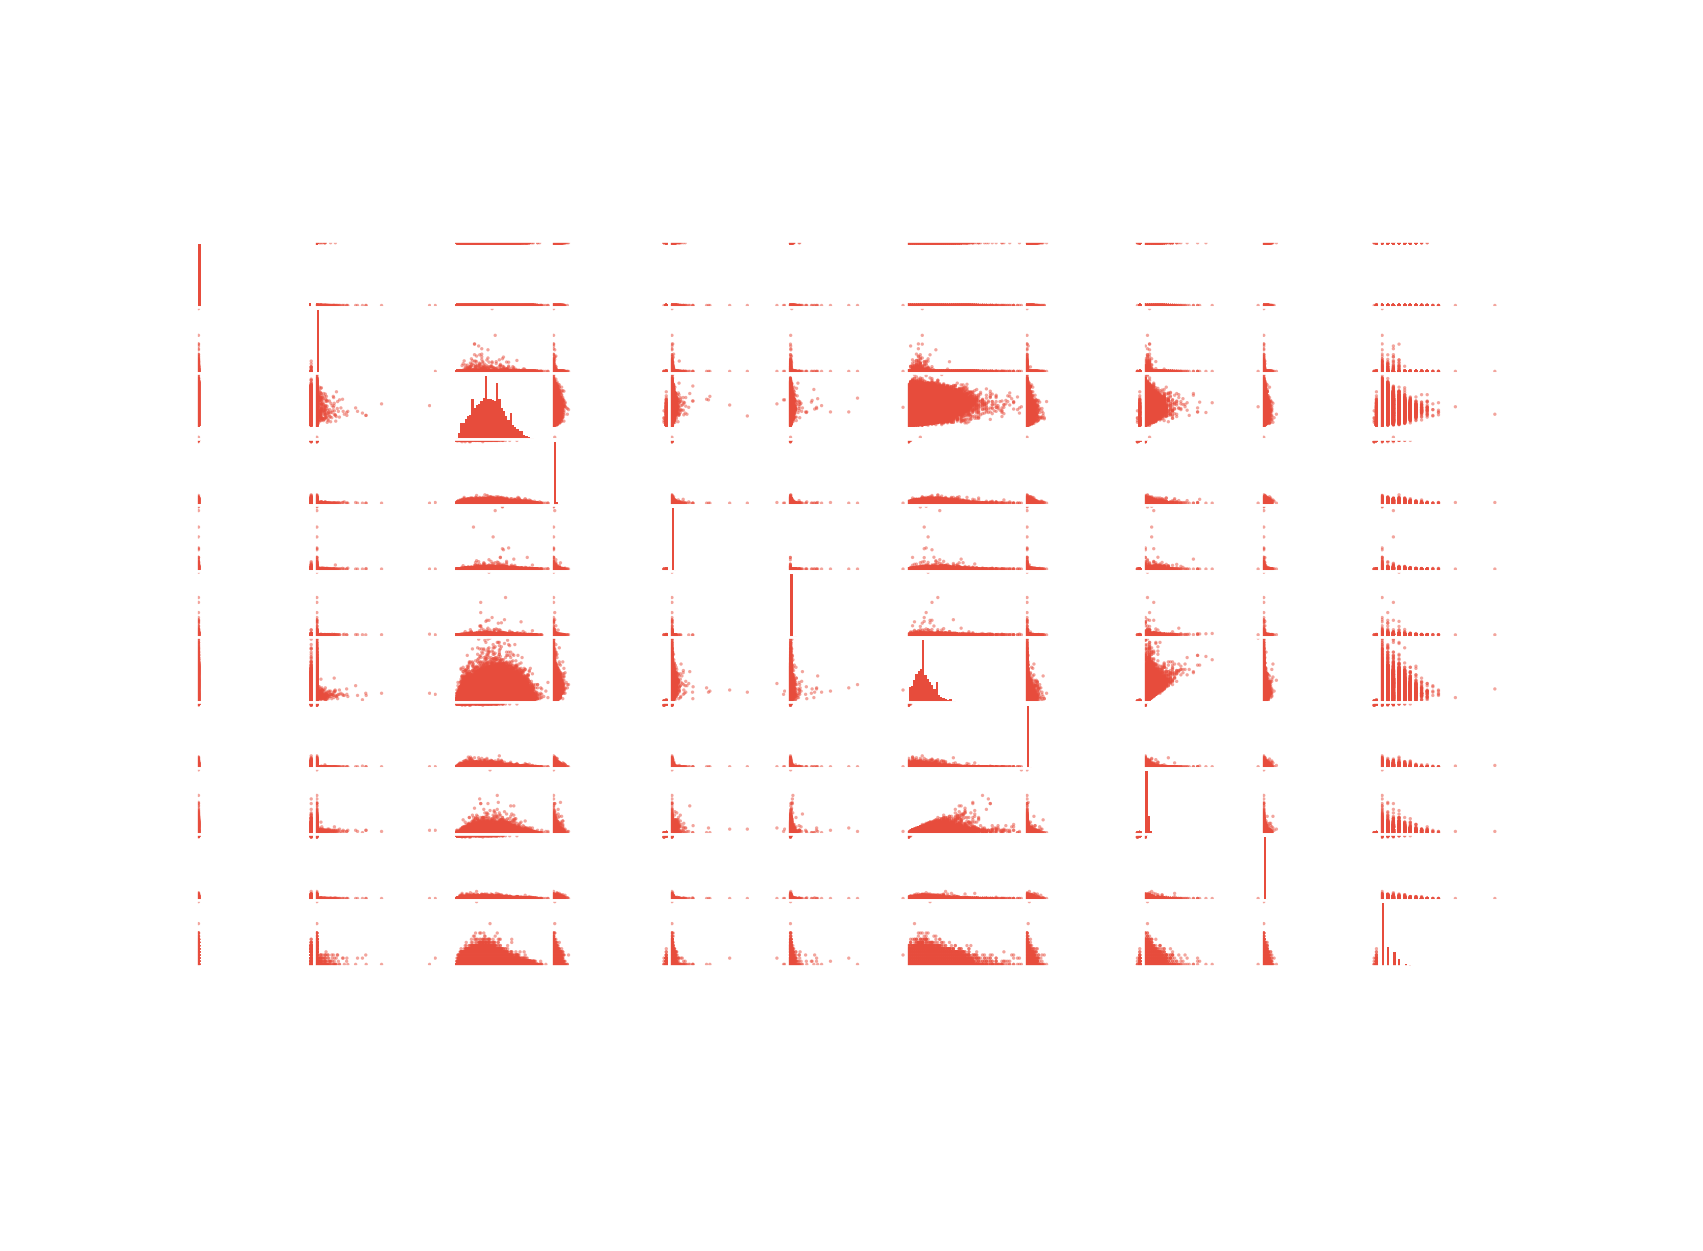

In [3]:
pd.plotting.scatter_matrix(df);

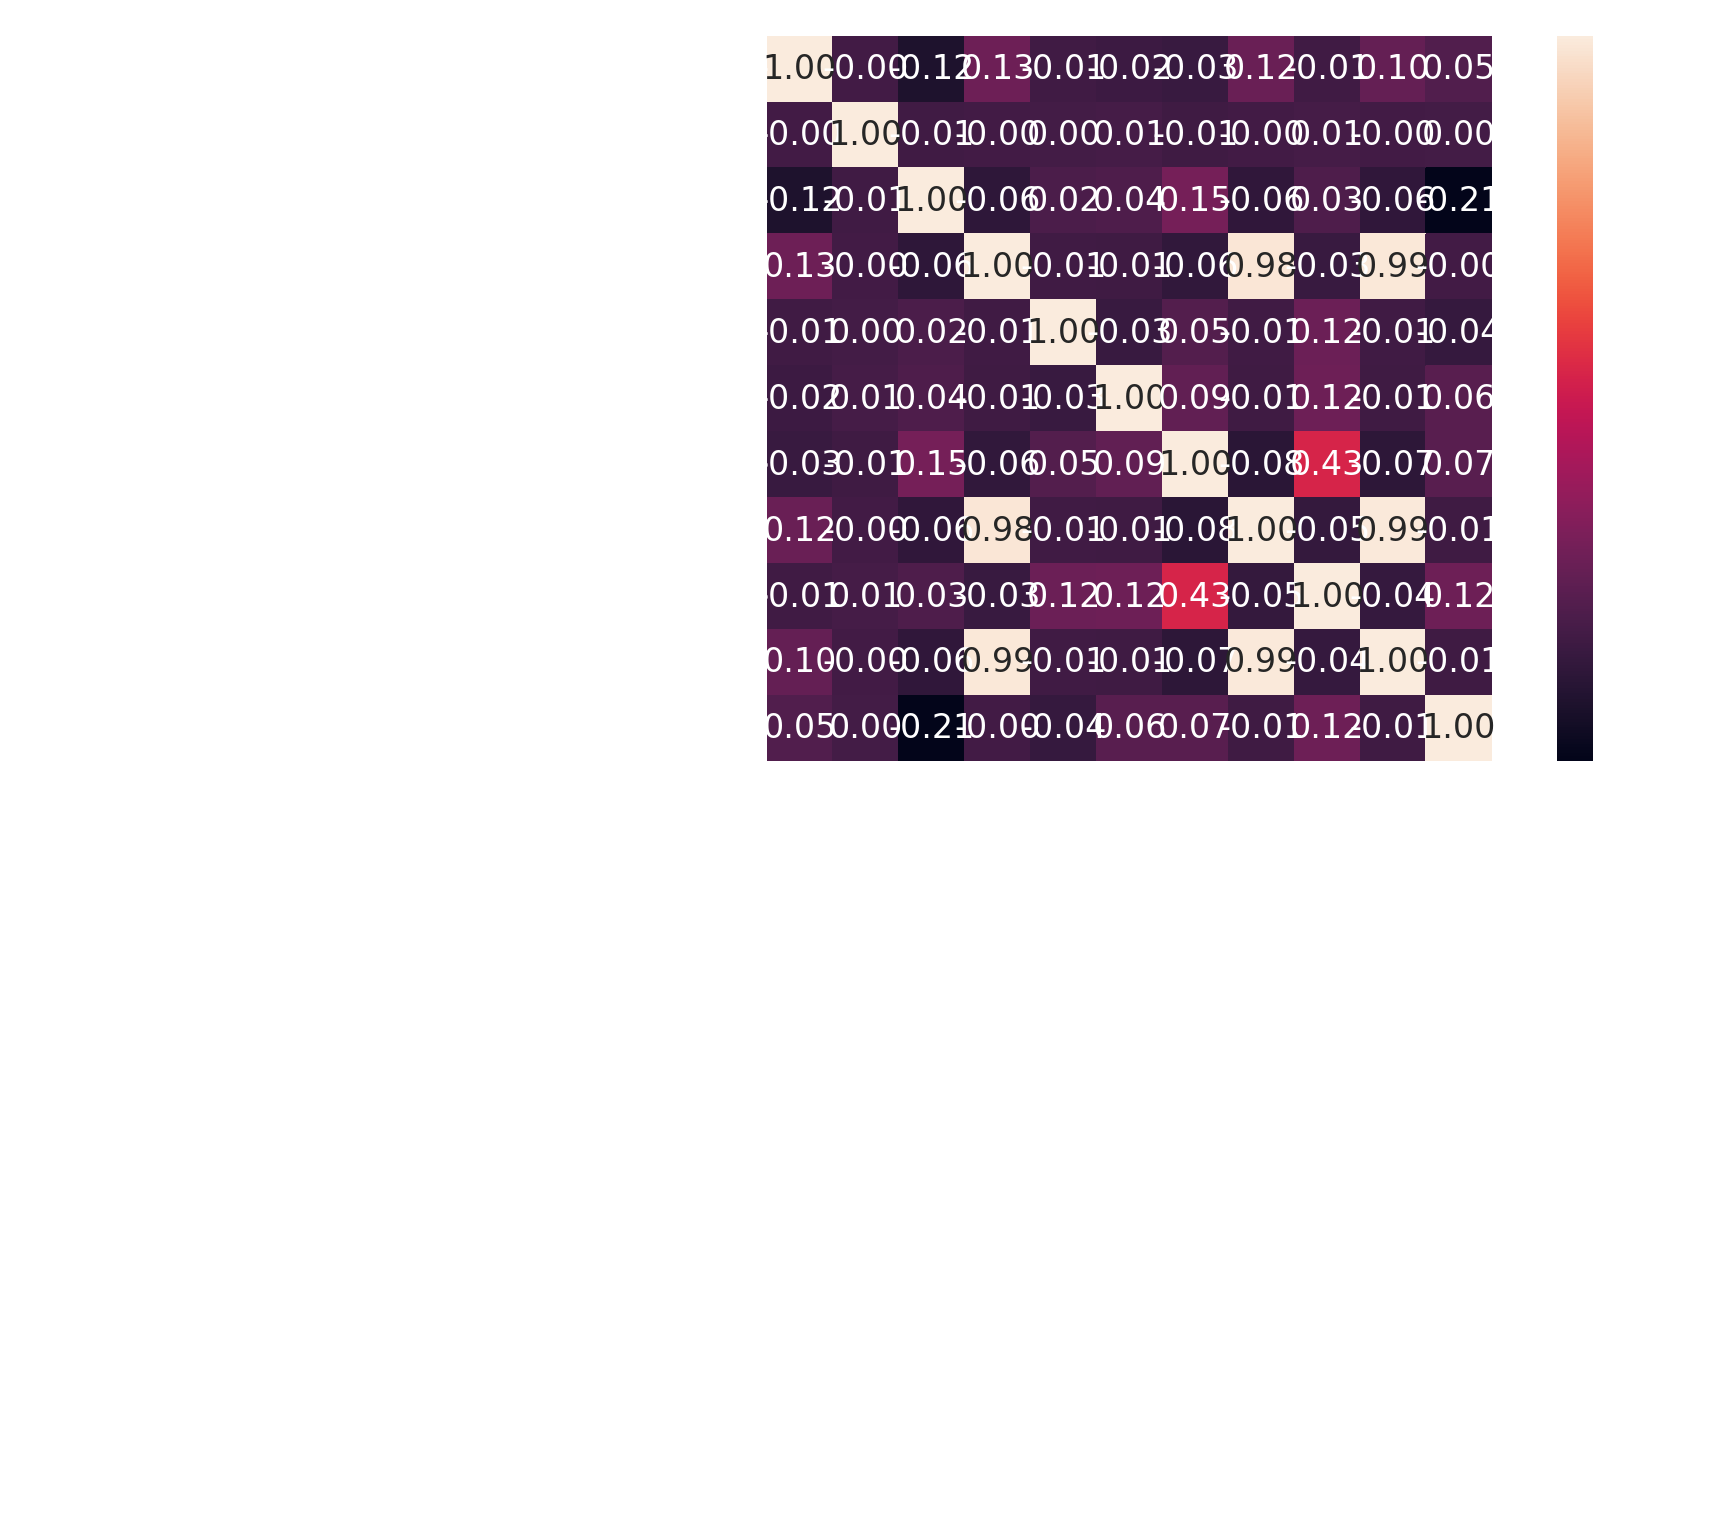

In [4]:
import seaborn as sb
ax = sb.heatmap(df.corr(), annot=True, fmt="0.2f", square=True);

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


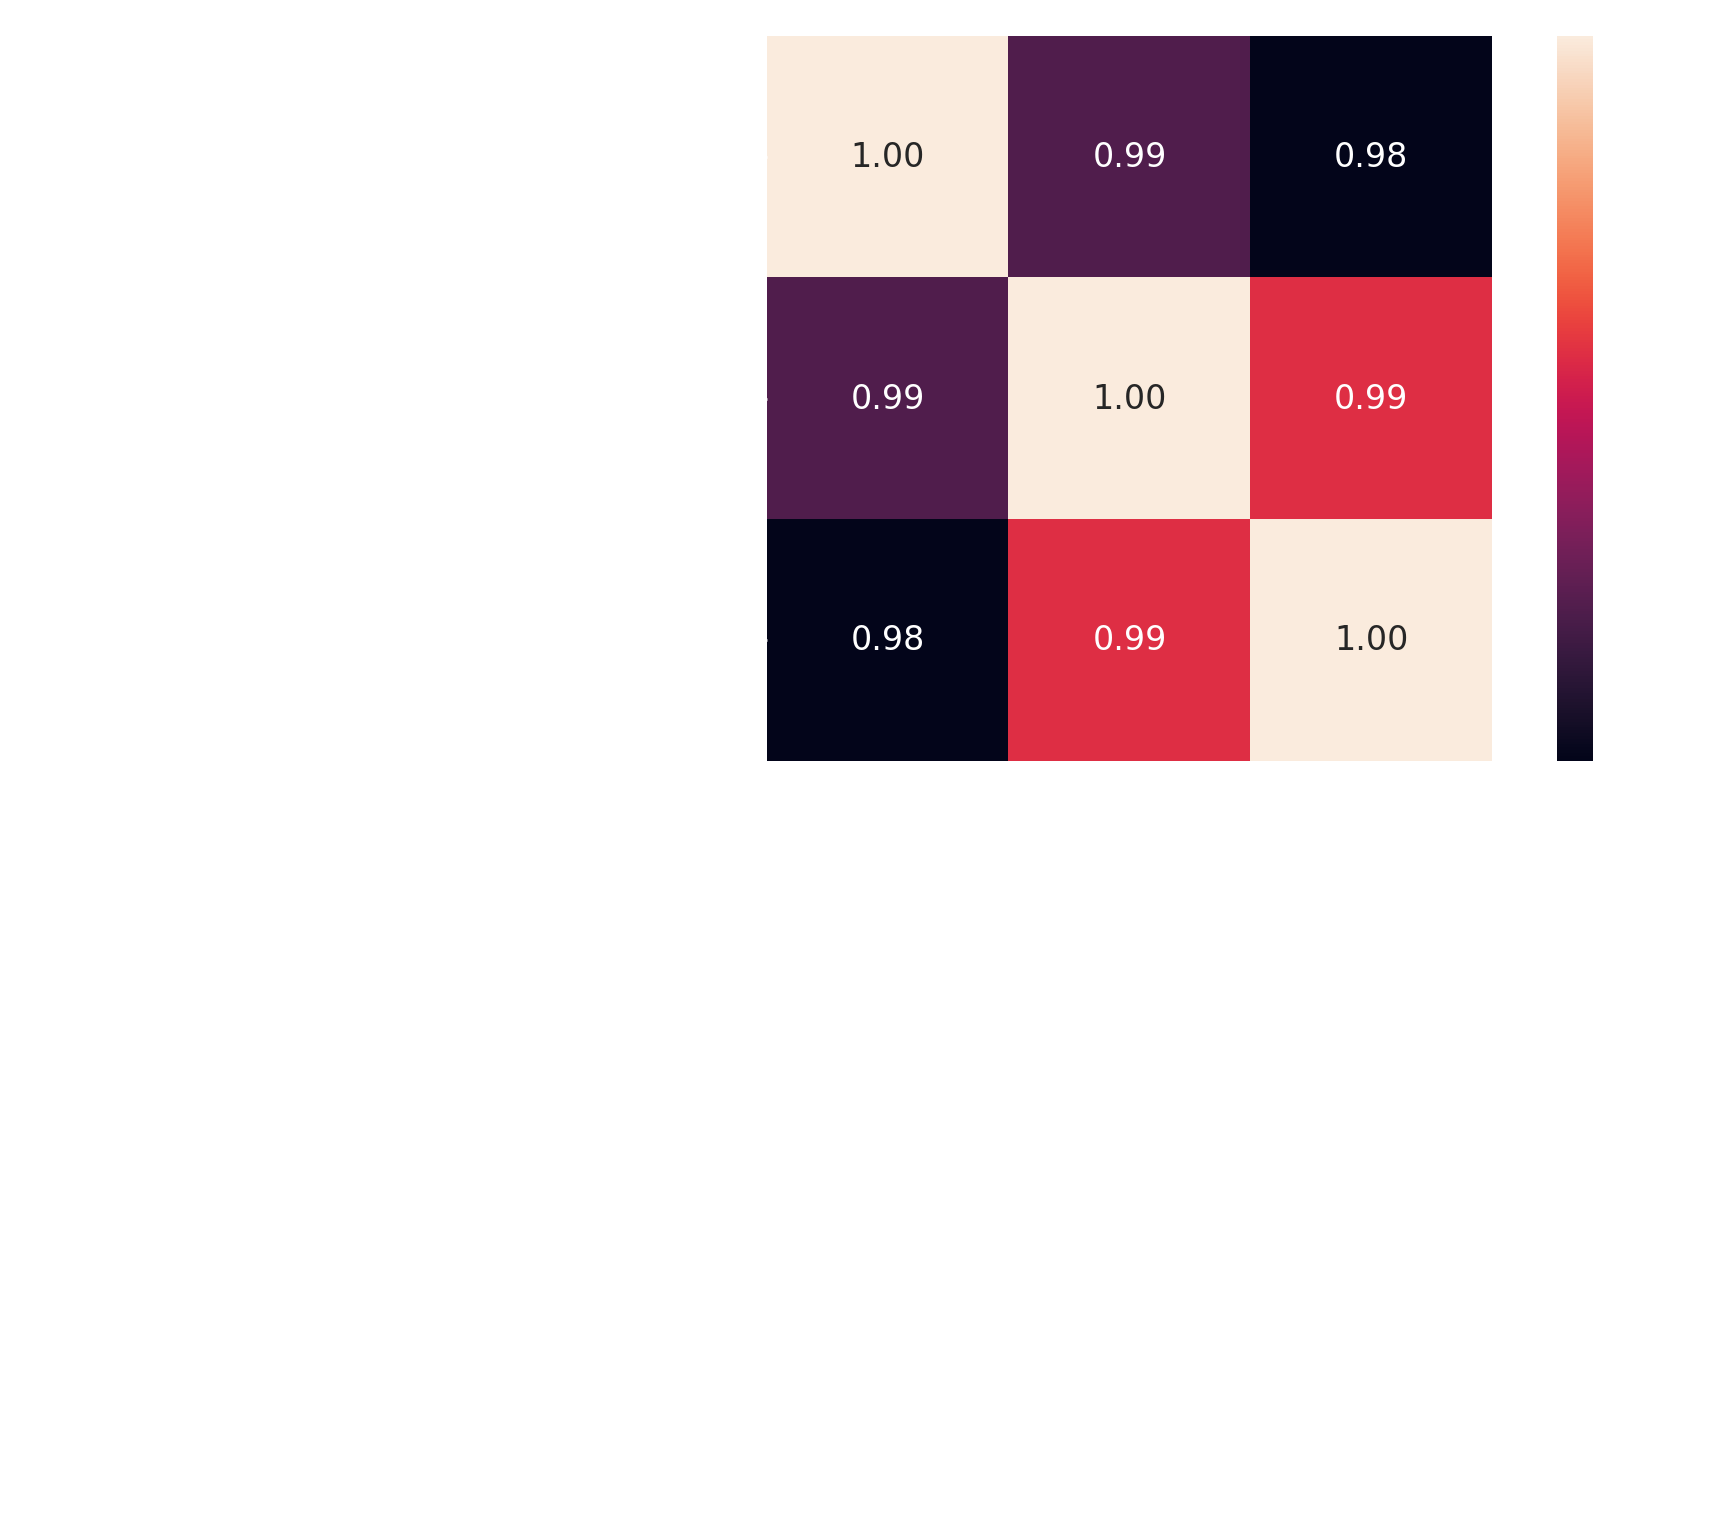

In [4]:
import seaborn as sb
ax = sb.heatmap(df[['NumberOfTime3059DaysPastDueNotWorse', 'NumberOfTime6089DaysPastDueNotWorse' ,'NumberOfTimes90DaysLate']].corr(), annot=True, fmt="0.2f", square=True);

# 1D plots

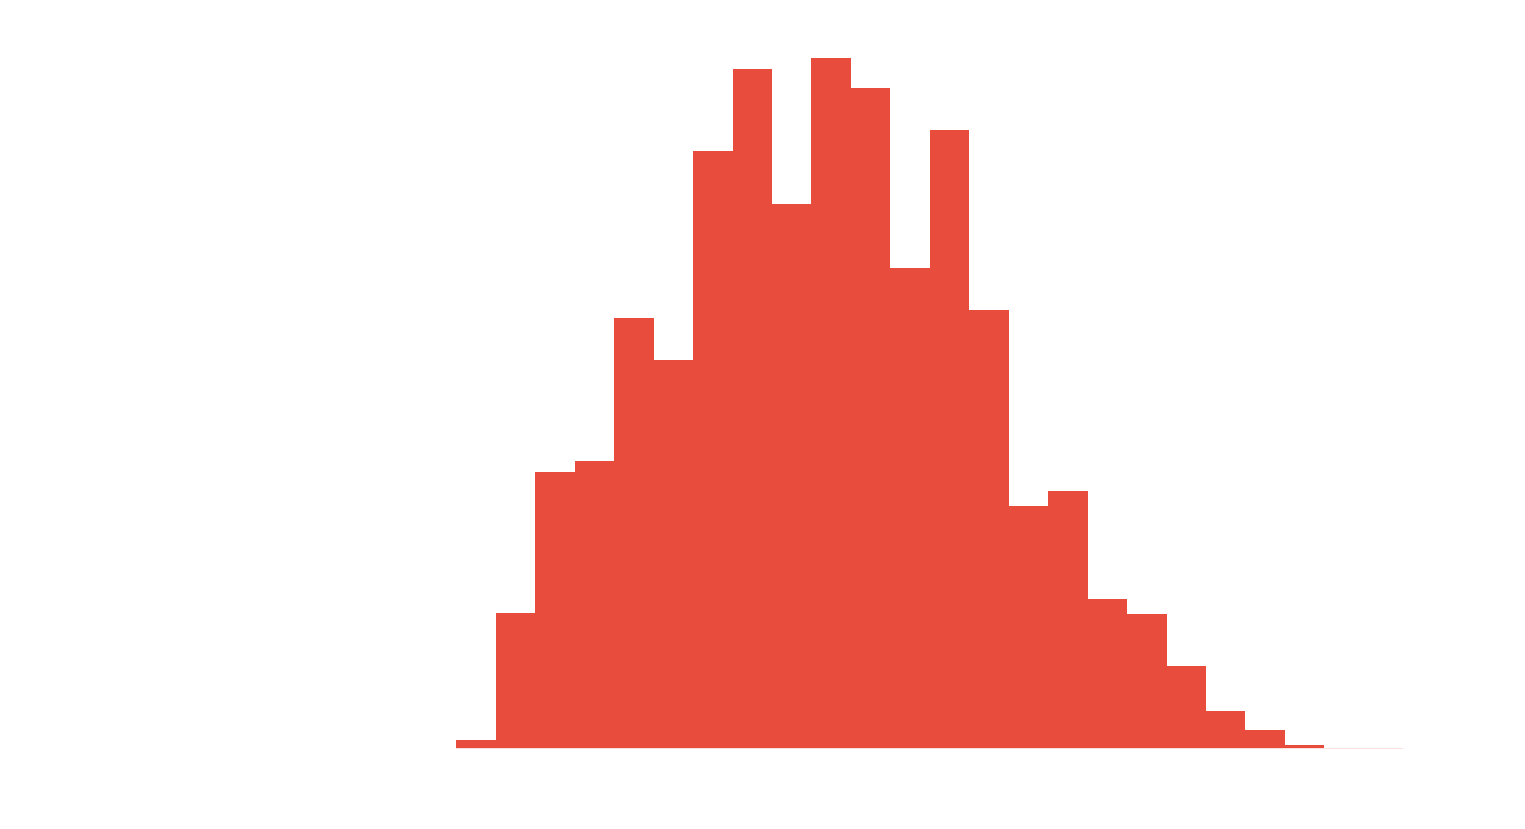

In [5]:
df.age.plot.hist(bins=30);

In [ ]:
df.SeriousDlqin2yrs.plot.bar(x="SeriousDlqin2yrs", y="age");

# 2D plots

In [ ]:
df['SeriousDlqin2yrs'] = df['SeriousDlqin2yrs'].astype('bool')

SeriousDlqin2yrs = df.groupby(by="SeriousDlqin2yrs").median().reset_index()

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(SeriousDlqin2yrs["SeriousDlqin2yrs"], SeriousDlqin2yrs["age"], label="age",
       edgecolor="w", color=["tab:green", "red"])
ax.set_xlabel("SeriousDlqin2yrs")
ax.set_ylabel("age")
ax.set_xticks(df["SeriousDlqin2yrs"]);

In [ ]:
df.plot.scatter("age", "RevolvingUtilizationOfUnsecuredLines");

In [ ]:
import seaborn as sb
sb.scatterplot("age", "RevolvingUtilizationOfUnsecuredLines", hue="age", s=30, edgecolor="none", data=df);